In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

data_path = '/content/drive/MyDrive/Datasets/Capacity Dataset/' # path to the directory containing the CSV files
combined_data = pd.DataFrame()

for filename in os.listdir(data_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(data_path, filename)
        df = pd.read_excel(file_path)
        combined_data = combined_data.append(df, ignore_index=True)


<ipython-input-3-1ce44fafeaec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
<ipython-input-3-1ce44fafeaec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
<ipython-input-3-1ce44fafeaec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
<ipython-input-3-1ce44fafeaec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)


In [35]:
Cycle_11 = '/content/drive/MyDrive/Datasets/Capacity Dataset/Exp_Aging_Charge_11_25oC.xlsx'
Cycle_5 = '/content/drive/MyDrive/Datasets/Capacity Dataset/Exp_Aging_Charge_5_25oC.xlsx'
Cycle_8 = '/content/drive/MyDrive/Datasets/Capacity Dataset/Exp_Aging_Charge_8_25oC.xlsx'
Cycle_9 = '/content/drive/MyDrive/Datasets/Capacity Dataset/Exp_Aging_Charge_9_25oC.xlsx'

'/content/drive/MyDrive/Datasets/Capacity Dataset/Exp_Aging_Charge_11_25oC.xlsx'

In [4]:
df = combined_data
df.columns

Index(['Time / s', 'Current / A', 'Voltage / V', 'HGR_tot/W', 'OCV/V',
       'Capacity/Ah', 'SOC', 'T_ave_total / °C', 'class'],
      dtype='object')

In [5]:
# Print the first few rows of the dataset
print(df.head())

# Get the column names
print(df.columns)

# Get the data types of each column
print(df.dtypes)

# Get summary statistics of the dataset
print(df.describe())


   Time / s  Current / A  Voltage / V  HGR_tot/W     OCV/V  Capacity/Ah  SOC  \
0  0.000000          0.0     3.183467   0.267216  3.172186          0.0  0.0   
1  0.099941          0.0     3.183415   0.272741  3.172186          0.0  0.0   
2  0.200094          0.0     3.183397   0.267452  3.172186          0.0  0.0   
3  0.300175          0.0     3.183457   0.266997  3.172186          0.0  0.0   
4  0.400197          0.0     3.183447   0.267069  3.172186          0.0  0.0   

   T_ave_total / °C  class  
0         25.003322   54.4  
1         25.004998   54.4  
2         25.000945   54.4  
3         25.004026   54.4  
4         25.001807   54.4  
Index(['Time / s', 'Current / A', 'Voltage / V', 'HGR_tot/W', 'OCV/V',
       'Capacity/Ah', 'SOC', 'T_ave_total / °C', 'class'],
      dtype='object')
Time / s            float64
Current / A         float64
Voltage / V         float64
HGR_tot/W           float64
OCV/V               float64
Capacity/Ah         float64
SOC                 float

In [6]:
df = df.dropna()

In [7]:
from sklearn.impute import SimpleImputer

X = df.drop("class", axis =1).values
y = df['class'].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # normalize input variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data into training and testing sets


# Linear Regression Model 

In [26]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
y_pred = LinearRegressionModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)


MSE: 2.1988311629576547
MAE: 1.010861122834268
R2: 0.8242739978198474


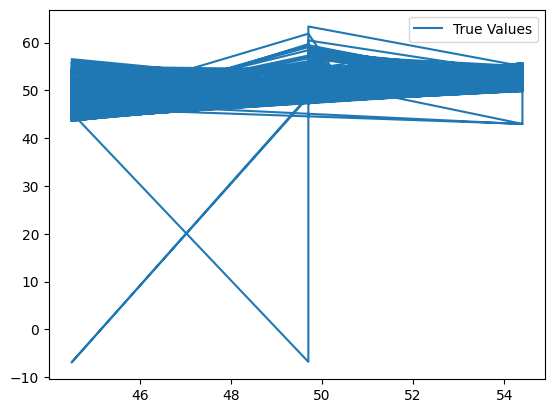

In [27]:

# plot results
plt.plot(y_test, y_pred, label='True Values')

plt.legend()
plt.show()

# NN Model 

In [32]:
NN_Model = Sequential()
NN_Model.add(Dense(32, input_dim=8, activation='relu'))
NN_Model.add(Dense(16, activation='relu'))
NN_Model.add(Dense(1, activation='linear'))
NN_Model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = NN_Model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
3206/3206 [==============================] - 11s 3ms/step - loss: 134.4409 - mae: 5.3359 - val_loss: 2.0021 - val_mae: 1.1341
Epoch 2/50
3206/3206 [==============================] - 8s 3ms/step - loss: 1.4924 - mae: 0.6977 - val_loss: 2.6756 - val_mae: 1.5033
Epoch 3/50
3206/3206 [==============================] - 10s 3ms/step - loss: 0.9414 - mae: 0.5825 - val_loss: 2.3230 - val_mae: 1.4050
Epoch 4/50
3206/3206 [==============================] - 9s 3ms/step - loss: 0.7299 - mae: 0.5206 - val_loss: 2.1311 - val_mae: 1.3404
Epoch 5/50
3206/3206 [==============================] - 7s 2ms/step - loss: 0.6290 - mae: 0.4822 - val_loss: 2.0867 - val_mae: 1.3051
Epoch 6/50
3206/3206 [==============================] - 8s 3ms/step - loss: 0.5857 - mae: 0.4642 - val_loss: 2.1553 - val_mae: 1.3195
Epoch 7/50
3206/3206 [==============================] - 7s 2ms/step - loss: 0.5653 - mae: 0.4541 - val_loss: 2.6153 - val_mae: 1.3786
Epoch 8/50
3206/3206 [==============================] - 9s

In [29]:
y_pred = NN_Model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

802/802 [==============================] - 1s 1ms/step
R-squared score: 0.8261948060752516


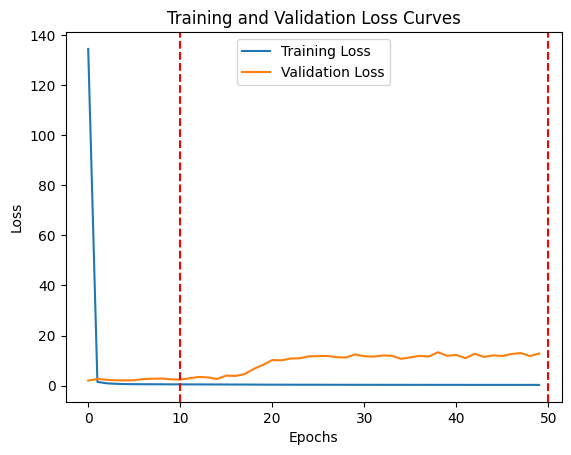

In [33]:

# plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# add vertical lines to indicate overfitting or underfitting
# the threshold values are arbitrary and may need to be adjusted based on the dataset
plt.axvline(x=10, color='red', linestyle='--')
plt.axvline(x=50, color='red', linestyle='--')

# add labels and title
plt.title('Training and Validation Loss Curves')
plt.show()

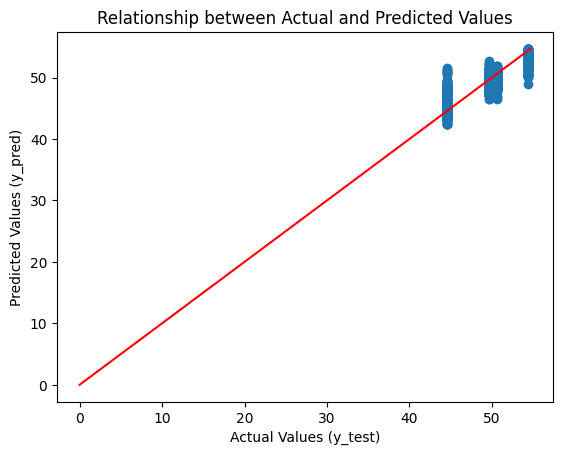

In [31]:
# assuming y_pred and y_test are numpy arrays with the same shape
# plot y_test (x-axis) vs y_pred (y-axis)
plt.scatter(y_test, y_pred)
y_test_1d = np.ravel(y_test)
y_test_1d = y_test.flatten()
y_pred_1d = np.ravel(y_pred)
y_pred_1d = y_pred.flatten()

# add a diagonal line representing perfect correlation
max_value = np.max([y_test_1d, y_pred_1d])
plt.plot([0, max_value], [0, max_value], color='red')

# add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Relationship between Actual and Predicted Values')

# show the plot
plt.show()

In [ ]:
plt.plot(, y_noise, label='Noisy Values')
plt.plot(x, y_pred, label='Predicted Values')

# AdaBoostRegressor model 

In [14]:
# Create a decision tree regressor as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=2)

# Create an AdaBoost regressor with 100 estimators
AdaBoostRegressorModelAllFeatures = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the model on the training data
AdaBoostRegressorModelAllFeatures.fit(X_train, y_train)

# Predict on the test data
y_pred = AdaBoostRegressorModelAllFeatures.predict(X_test)

# Evaluate the model using the mean squared error metric and R sequare

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
print("Mean Squared Error: ", mse)
print("R-squared score:", r2)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE:  2.003184080292323
Mean Squared Error:  8.088810449523029
R-squared score: 0.35355913330981925


# Decision Tree Model

In [9]:
# Create a decision tree regressor with maximum depth of 3
DecisionTreeRegressorModelAllFeatures = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on the training data
DecisionTreeRegressorModelAllFeatures.fit(X_train, y_train)

# Predict on the test data
y_pred = DecisionTreeRegressorModelAllFeatures.predict(X_test)

# Evaluate the model using the mean squared error metric
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
print("Mean Squared Error: ", mse)
print("R-squared score:", r2)

MAE:  1.4083100180174628
Mean Squared Error:  4.748390990476369
R-squared score: 0.6205184920054108


# CNN Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


X = X.reshape(X.shape[0], X.shape[1], 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
CNN_ModelAllFeatures = Sequential()
CNN_ModelAllFeatures.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
CNN_ModelAllFeatures.add(MaxPooling1D(pool_size=2))
CNN_ModelAllFeatures.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
CNN_ModelAllFeatures.add(MaxPooling1D(pool_size=1))
CNN_ModelAllFeatures.add(Flatten())
CNN_ModelAllFeatures.add(Dense(100, activation='relu'))
CNN_ModelAllFeatures.add(Dense(1, activation='linear'))

# Compile the model
CNN_ModelAllFeatures.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
history = CNN_ModelAllFeatures.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
3206/3206 [==============================] - 10s 3ms/step - loss: 43.5154 - mae: 2.5997 - val_loss: 1.1281 - val_mae: 0.6843
Epoch 2/50
3206/3206 [==============================] - 10s 3ms/step - loss: 0.9931 - mae: 0.6307 - val_loss: 0.8543 - val_mae: 0.6105
Epoch 3/50
3206/3206 [==============================] - 11s 3ms/step - loss: 0.7855 - mae: 0.5636 - val_loss: 0.7601 - val_mae: 0.5870
Epoch 4/50
3206/3206 [==============================] - 10s 3ms/step - loss: 0.7084 - mae: 0.5354 - val_loss: 1.0901 - val_mae: 0.7319
Epoch 5/50
3206/3206 [==============================] - 9s 3ms/step - loss: 0.6633 - mae: 0.5163 - val_loss: 0.5489 - val_mae: 0.4725
Epoch 6/50
3206/3206 [==============================] - 10s 3ms/step - loss: 0.6074 - mae: 0.4886 - val_loss: 0.6607 - val_mae: 0.5302
Epoch 7/50
3206/3206 [==============================] - 11s 4ms/step - loss: 0.6003 - mae: 0.4908 - val_loss: 0.4806 - val_mae: 0.4381
Epoch 8/50
3206/3206 [==============================] -

In [ ]:
r_squared = CNN_ModelAllFeatures.evaluate(X_test, y_test)
print('R-squared value:', r_squared)

802/802 [==============================] - 1s 2ms/step - loss: 0.1459 - mae: 0.1782
R-squared value: [0.14593251049518585, 0.1781974732875824]


# XGBRegressor Model

In [18]:

# Define the XGBoost model
XGBoostModel = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
XGBoostModel.fit(X_train, y_train)

# Predict the target variable
y_pred = XGBoostModel.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', r2)


MAE: 0.026314845117864912
MSE: 0.012814298126707577
R-squared: 0.9989759080103622


In [22]:
! pip install gplearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
X_train = X_train.reshape((102590, -1))


# SymbolicRegressor Model

In [24]:
from sklearn.preprocessing import StandardScaler
from gplearn.genetic import SymbolicRegressor

# define the symbolic regressor
SymbolicRegressorModelForAllFeatures = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv'))

# fit the model to the data
SymbolicRegressorModelForAllFeatures.fit(X_train, y_train)

# make predictions on the data
y_pred = SymbolicRegressorModelForAllFeatures.predict(X_test)

# evaluate performance using MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.94          53.9714        8          20.2261          20.1868     17.27m
   1    13.00          49.3413        9          18.7582          18.7816     13.53m
   2    17.42          50.3576       19          3.36458          3.38697     10.00m
   3    12.17          46.2814       10          2.82257          2.81744      6.58m
   4    15.04          31.1104       25          2.76908          2.79536      6.08m
   5    16.21          27.4427       26          2.70702          2.73788      5.00m
   6    18.11          22.3881       25          2.70675          2.74028      4.10m
   7    18.95          21.7406       25          2.61697          2.60452      2.93m
   8    19.32          22.3819       23          2.60967          2.63395  

# LSTM For All Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import metrics

# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
LSTMAllFeatures = Sequential()
LSTMAllFeatures.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])))
LSTMAllFeatures.add(Dense(1))
LSTMAllFeatures.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
LSTMAllFeatures.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
1603/1603 [==============================] - 7s 3ms/step - loss: 432.9718 - mae: 13.7363 - val_loss: 55.3742 - val_mae: 4.9944
Epoch 2/50
1603/1603 [==============================] - 4s 3ms/step - loss: 37.8969 - mae: 4.4151 - val_loss: 24.1279 - val_mae: 3.8063
Epoch 3/50
1603/1603 [==============================] - 4s 3ms/step - loss: 17.3861 - mae: 3.3149 - val_loss: 14.5109 - val_mae: 3.0545
Epoch 4/50
1603/1603 [==============================] - 5s 3ms/step - loss: 12.8085 - mae: 2.8655 - val_loss: 11.1206 - val_mae: 2.6508
Epoch 5/50
1603/1603 [==============================] - 4s 3ms/step - loss: 9.4441 - mae: 2.4148 - val_loss: 7.3743 - val_mae: 2.1450
Epoch 6/50
1603/1603 [==============================] - 4s 3ms/step - loss: 6.0612 - mae: 1.8166 - val_loss: 4.2996 - val_mae: 1.5785
Epoch 7/50
1603/1603 [==============================] - 5s 3ms/step - loss: 4.0619 - mae: 1.3095 - val_loss: 2.8478 - val_mae: 1.1229
Epoch 8/50
1603/1603 [==============================

In [ ]:

# Make predictions
y_pred = LSTMAllFeatures.predict(X_test)

# Calculate metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
#r_squared = metrics.r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
#print('R squared:', r_squared)


802/802 [==============================] - 2s 2ms/step
MAE: tf.Tensor([3.0436296 4.7449923 2.7164636 ... 5.1589093 4.9858627 3.0458941], shape=(25648,), dtype=float32)
MSE: tf.Tensor([14.802453  35.02778   12.515262  ... 38.484673  34.96809   13.0456915], shape=(25648,), dtype=float32)


In [11]:
columns =  ['Time', 'Current', 'Voltage', 'HGR_tot', 'OCV','Capacity', 'SOC', 'T_ave_total']

# Which feature is most important for predicting the capacity? 
Using all the features in the experimental data to train and evaluate the model.

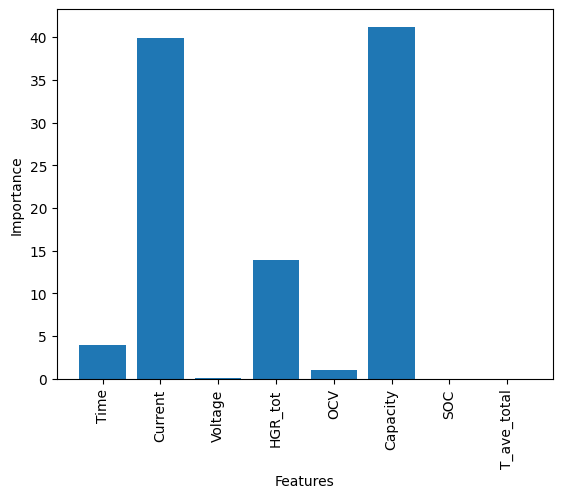

In [16]:
import matplotlib.pyplot as plt

# Get feature importances
importances = DecisionTreeRegressorModelAllFeatures.feature_importances_
importances = np.array(importances) * 100

# Plot feature importances
plt.bar(columns, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


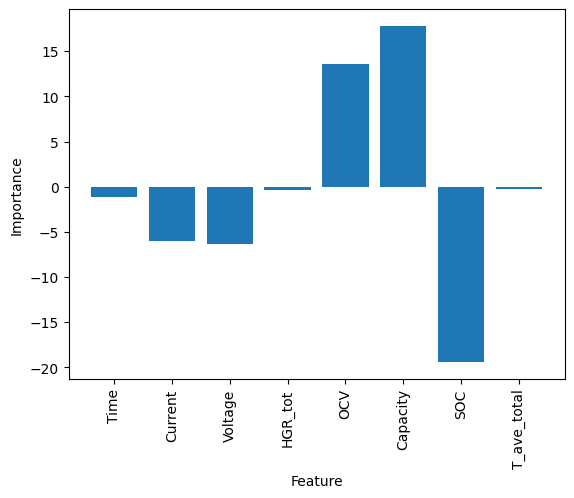

In [14]:

# get the coefficient values for each feature
coefficients = LinearRegressionModel.coef_

# plot the feature importances as a bar chart
plt.bar(columns, coefficients)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

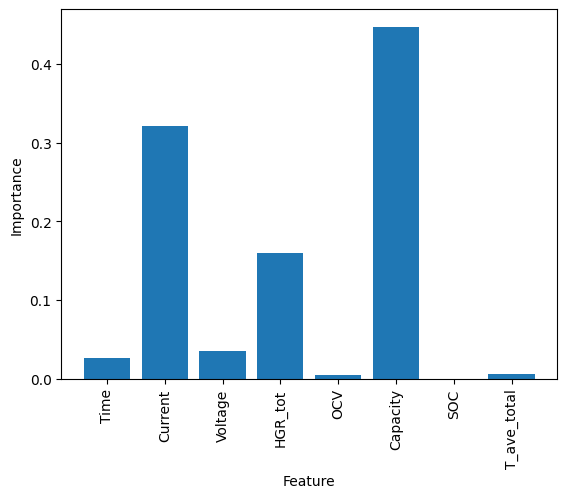

In [21]:
#feature importance of XGBoost model 
XGBoostModelImportances = XGBoostModel.feature_importances_

# plot the feature importances as a bar chart
plt.bar(columns, XGBoostModelImportances)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Drop SOC Common Less important Feature in 3 models


In [10]:
df_ = df.drop(['SOC'], axis = 1)
df_

Time / s  Current / A  Voltage / V  HGR_tot/W     OCV/V  \
0          0.000000          0.0     3.183467   0.267216  3.172186   
1          0.099941          0.0     3.183415   0.272741  3.172186   
2          0.200094          0.0     3.183397   0.267452  3.172186   
3          0.300175          0.0     3.183457   0.266997  3.172186   
4          0.400197          0.0     3.183447   0.267069  3.172186   
...             ...          ...          ...        ...       ...   
185651  3315.729345          0.0     4.191806   1.238998  4.181046   
185652  3315.829345          0.0     4.191750   1.239300  4.181046   
185653  3315.929341          0.0     4.191690   1.239714  4.181046   
185654  3316.028431          0.0     4.191598   1.239964  4.181046   
185655  3316.128430          0.0     4.191559   1.240276  4.181046   

        Capacity/Ah  T_ave_total / °C  class  
0               0.0         25.003322   54.4  
1               0.0         25.004998   54.4  
2               0.0         25.000945   54.4  
3               0.0         25.004026   54.4  
4               0.0         25.001807   54.4  
...             ...               ...    ...  
185651          0.0         24.959779   44.5  
185652          0.0         24.962424   44.5  
185653          0.0         24.963762   44.5  
185654          0.0         24.960565   44.5  
185655          0.0         24.961030   44.5  

[128238 rows x 8 columns]

In [11]:
X_ = df_.drop("class", axis =1).values
y_ = df_['class'].values
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0) # normalize input variables
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42) # split data into training and testing sets

# Linear Regression.

In [12]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train_, y_train_)
y_pred = LinearRegressionModel.predict(X_test_)
mse = mean_squared_error(y_test_, y_pred)
r2 = r2_score(y_test_, y_pred)
mae = mean_absolute_error(y_test_, y_pred)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)


MSE: 4.731771905259775
MAE: 1.4734877732457627
R2: 0.6218466546466366


# NN Model

In [23]:
NN_Model_ = Sequential()
NN_Model_.add(Dense(32, input_dim=7, activation='relu'))
NN_Model_.add(Dense(16, activation='relu'))
NN_Model_.add(Dense(1, activation='linear'))
NN_Model_.compile(loss='mse', optimizer='adam', metrics=['mae'])
NN_Model_.fit(X_train_, y_train_, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
2565/2565 [==============================] - 9s 3ms/step - loss: 129.9712 - mae: 5.2895 - val_loss: 4.9935 - val_mae: 1.3394
Epoch 2/50
2565/2565 [==============================] - 8s 3ms/step - loss: 2.6863 - mae: 0.9376 - val_loss: 1.3325 - val_mae: 0.6402
Epoch 3/50
2565/2565 [==============================] - 5s 2ms/step - loss: 1.1544 - mae: 0.6218 - val_loss: 0.9772 - val_mae: 0.6095
Epoch 4/50
2565/2565 [==============================] - 7s 3ms/step - loss: 0.8556 - mae: 0.5548 - val_loss: 0.7561 - val_mae: 0.5365
Epoch 5/50
2565/2565 [==============================] - 6s 2ms/step - loss: 0.7217 - mae: 0.5096 - val_loss: 0.6699 - val_mae: 0.4914
Epoch 6/50
2565/2565 [==============================] - 6s 2ms/step - loss: 0.6200 - mae: 0.4643 - val_loss: 0.5603 - val_mae: 0.4321
Epoch 7/50
2565/2565 [==============================] - 6s 2ms/step - loss: 0.5648 - mae: 0.4435 - val_loss: 0.5625 - val_mae: 0.4468
Epoch 8/50
2565/2565 [==============================] - 5s 2

In [24]:
y_pred = NN_Model_.predict(X_test_)
r2 = r2_score(y_test_, y_pred)
print("R-squared score:", r2)

802/802 [==============================] - 1s 1ms/step
R-squared score: 0.9729429660455502


# AdaBoost Regressor

In [25]:
# Create a decision tree regressor as the base estimator
base_estimator_ = DecisionTreeRegressor(max_depth=2)

# Create an AdaBoost regressor with 100 estimators
AdaBoostRegressorModel_ = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the model on the training data
AdaBoostRegressorModel_.fit(X_train_, y_train_)

# Predict on the test data
y_pred = AdaBoostRegressorModel_.predict(X_test_)

# Evaluate the model using the mean squared error metric and R sequare

mse = mean_squared_error(y_test_, y_pred)
r2 = r2_score(y_test_, y_pred)
mae = mean_absolute_error(y_test_, y_pred)
print("MAE: ", mae)
print("Mean Squared Error: ", mse)
print("R-squared score:", r2)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE:  2.003184080291957
Mean Squared Error:  8.088810449523153
R-squared score: 0.35355913330980937


In [26]:
# Create a decision tree regressor with maximum depth of 3
DecisionTreeRegressorModelAllFeatures = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on the training data
DecisionTreeRegressorModelAllFeatures.fit(X_train_, y_train_)

# Predict on the test data
y_pred = DecisionTreeRegressorModelAllFeatures.predict(X_test_)

# Evaluate the model using the mean squared error metric
mse = mean_squared_error(y_test_, y_pred)
r2 = r2_score(y_test_, y_pred)
mae = mean_absolute_error(y_test_, y_pred)
print("MAE: ", mae)
print("Mean Squared Error: ", mse)
print("R-squared score:", r2)

MAE:  1.4083100180173596
Mean Squared Error:  4.748390990476374
R-squared score: 0.6205184920054104


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Reshape data for CNN input
X_train_ = X_train_.reshape((X_train_.shape[0], X_train_.shape[1], 1))
X_test_ = X_test_.reshape((X_test_.shape[0], X_test_.shape[1], 1))

# Build CNN model
CNN_model_ = Sequential()
CNN_model_.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(7,1)))
CNN_model_.add(MaxPooling1D(pool_size=1))
CNN_model_.add(Flatten())
CNN_model_.add(Dense(100, activation='relu'))
CNN_model_.add(Dropout(0.2))
CNN_model_.add(Dense(1, activation='linear'))
CNN_model_.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Fit model to training data
history = CNN_model_.fit(X_train_, y_train_, epochs=50, batch_size=32, validation_data=(X_test_, y_test_))

# Evaluate model on test data
loss, mae = CNN_model_.evaluate(X_test_, y_test_)
print(f'Test MAE: {mae}')


Epoch 1/50
3206/3206 [==============================] - 15s 4ms/step - loss: 56.8488 - mae: 4.4203 - val_loss: 1.5928 - val_mae: 0.6955
Epoch 2/50
3206/3206 [==============================] - 8s 3ms/step - loss: 14.4466 - mae: 3.0048 - val_loss: 1.1144 - val_mae: 0.5971
Epoch 3/50
3206/3206 [==============================] - 11s 3ms/step - loss: 13.7389 - mae: 2.9362 - val_loss: 0.9873 - val_mae: 0.6227
Epoch 4/50
3206/3206 [==============================] - 10s 3ms/step - loss: 12.9919 - mae: 2.8561 - val_loss: 0.8428 - val_mae: 0.5253
Epoch 5/50
3206/3206 [==============================] - 9s 3ms/step - loss: 12.3113 - mae: 2.7837 - val_loss: 0.9220 - val_mae: 0.6610
Epoch 6/50
3206/3206 [==============================] - 10s 3ms/step - loss: 11.9058 - mae: 2.7357 - val_loss: 2.2061 - val_mae: 1.2527
Epoch 7/50
3206/3206 [==============================] - 10s 3ms/step - loss: 11.3162 - mae: 2.6707 - val_loss: 2.0402 - val_mae: 1.3055
Epoch 8/50
3206/3206 [============================

In [28]:
r_squared = CNN_model_.evaluate(X_test_, y_test_)
print('R-squared value:', r_squared)

802/802 [==============================] - 1s 2ms/step - loss: 0.2661 - mae: 0.3065
R-squared value: [0.2660728096961975, 0.3065435588359833]


# XGB Regressor

In [30]:
# Define the XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42) # split data into training and testing sets
# Fit the model
model.fit(X_train_, y_train_)

# Predict the target variable
y_pred = model.predict(X_test_)

# Evaluate the model
mae = mean_absolute_error(y_test_, y_pred)
mse = mean_squared_error(y_test_, y_pred)
r2 = r2_score(y_test_, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', r2)


MAE: 0.026314845117864912
MSE: 0.012814298126707577
R-squared: 0.9989759080103622


# Symbolic Regressor

In [34]:
from gplearn.genetic import SymbolicRegressor

# define the symbolic regressor
SymbolicRegressorModelFor3Features = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv'))

# fit the model to the data
SymbolicRegressorModelFor3Features.fit(X_, y_)

# make predictions on the data
y_pred = SymbolicRegressorModelFor3Features.predict(X_)

# evaluate performance using MAE, MSE, and R-squared
mae = mean_absolute_error(y_, y_pred)
mse = mean_squared_error(y_, y_pred)
r2 = r2_score(y_, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.86          55.2868        7          8.91042          8.93099      9.39m
   1    12.52           52.091       16           6.7503          6.72516      9.90m
   2    17.65           48.781        6          2.89597          2.90979     10.59m
   3    17.98          45.4965       10          2.70222          2.71954      8.85m
   4    17.87          31.2751       20          2.69137          2.69462      7.39m
   5    20.63          27.1505       20          2.68725          2.73169      6.58m
   6    17.74          31.8813       25          2.68371          2.70816      4.62m
   7    17.91          29.3144       21          2.66592          2.66566      3.09m
   8    13.31          29.3487       25          2.57965          2.60278  

# LSTM

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preprocess the data by scaling the features
scaler = MinMaxScaler()
df_[['Current / A', 'Voltage / V', 'HGR_tot/W', 'OCV/V', 'Capacity/Ah', 'T_ave_total / °C']] = scaler.fit_transform(df_[[ 'Current / A', 'Voltage / V', 'HGR_tot/W', 'OCV/V', 'Capacity/Ah', 'T_ave_total / °C']])
X_ = df_[['Current / A', 'Voltage / V', 'HGR_tot/W', 'OCV/V', 'Capacity/Ah', 'T_ave_total / °C']].values
y_ = df_['class'].values

# Split the data into training and testing sets
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)

# Define the LSTM model
LSTM_ = Sequential()
LSTM_.add(LSTM(64, input_shape=(X_train_.shape[1], 1)))
LSTM_.add(Dense(1, activation='linear'))

# Compile the model
LSTM_.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
LSTM_.fit(X_train_.reshape((X_train_.shape[0], X_train_.shape[1], 1)), y_train_, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
3206/3206 [==============================] - 24s 7ms/step - loss: 134.2302 - mae: 6.7809
Epoch 2/50
3206/3206 [==============================] - 22s 7ms/step - loss: 12.5362 - mae: 2.7150
Epoch 3/50
3206/3206 [==============================] - 22s 7ms/step - loss: 12.5371 - mae: 2.7238
Epoch 4/50
3206/3206 [==============================] - 22s 7ms/step - loss: 12.5368 - mae: 2.7296
Epoch 5/50
3206/3206 [==============================] - 21s 6ms/step - loss: 12.2961 - mae: 2.7390
Epoch 6/50
3206/3206 [==============================] - 23s 7ms/step - loss: 7.3812 - mae: 2.1007
Epoch 7/50
3206/3206 [==============================] - 21s 7ms/step - loss: 2.5836 - mae: 1.1593
Epoch 8/50
3206/3206 [==============================] - 22s 7ms/step - loss: 1.6760 - mae: 0.8559
Epoch 9/50
3206/3206 [==============================] - 20s 6ms/step - loss: 1.2875 - mae: 0.7205
Epoch 10/50
3206/3206 [==============================] - 21s 7ms/step - loss: 1.1051 - mae: 0.6529
Epoch 11/50
3

In [ ]:

# Evaluate the model
loss, mae = LSTM_.evaluate(X_test_.reshape((X_test_.shape[0], X_test_.shape[1], 1)), y_test_, verbose=0)
print("MAE:", mae)

MAE: 0.40252187848091125


In [39]:
# Create a decision tree regressor with maximum depth of 3
DecisionTree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on the training data
DecisionTree.fit(X_train, y_train)

# Predict on the test data
y_pred = DecisionTree.predict(X_test)

print(np.average(y_pred))
print(np.average(y_test))

49.69248648708686
49.717646600124766


In [41]:
# Define the XGBoost model
XGBoostModel = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
XGBoostModel.fit(X_train, y_train)

# Predict the target variable
y_pred = XGBoostModel.predict(X_test)

print(np.average(y_pred))
print(np.average(y_test))
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', r2)


49.717697
49.717646600124766
MAE: 0.026314845117864912
MSE: 0.012814298126707577
R-squared: 0.9989759080103622
